<font color='red'>
Grade: A
    
Problem 1: 
    
Part (a): Good
    
Part (b): Good  
    
Part (c): Number of epochs is not reported. Please see the solution. max_iter is not epoch
    
Part (d): 3.5 and 7 should be used
    
Part (e): Good
    
Problem 2
    
Part (a): Good
    
Part (b): Good
    
Part (c): Good
    
Part (d): Good
    
Problem 3
    
Part (a): Good
    
Part (b): Good
    
Part (c): Good
    
Part (d): Good

In [1]:
#Import library

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

## Problem 1

In [2]:
#Read file and set column names
ft = pd.read_table('Data/foodtruck.txt', delimiter= ',', header=None, names=["Population in 10k","Profit in 10k"])

#look at the head of the dataset
ft.head()


,Population in 10k,Profit in 10k
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<AxesSubplot:title={'center':'Profit vs Population of food truck company'}, xlabel='Population in 10k', ylabel='Profit in 10k'>

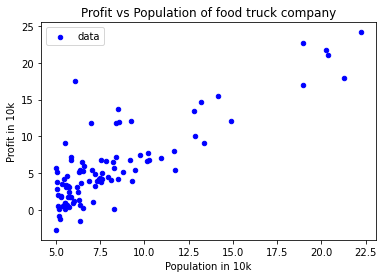

In [3]:
#1a - Show a scatter plot of the data (profit vs population)

ft.plot(kind='scatter', x= "Population in 10k", y= "Profit in 10k", color='b', 
        label='data', title='Profit vs Population of food truck company')

In [4]:
# 1b - Train a linear regression model with a non-iterative method. Show the minimum cost (RSS)

# Construct model
lin_reg = sklearn.linear_model.LinearRegression()

# Define x and y and make x into a 2d array
X = np.c_[ft["Population in 10k"]]
y = ft["Profit in 10k"]

# Train model
lin_reg.fit(X,y)

# Take a look at model coefficients
print('Beta hats for the linear model =',lin_reg.intercept_,lin_reg.coef_)

# Get Y-hat
y_pred = lin_reg.predict(X)

# Calculate RSS
RSS = np.sum(np.square(y-y_pred))
print("RSS for this linear model is",RSS)

Beta hats for the linear model = -3.89578087831185 [1.19303364]
RSS for this linear model is 868.5324469391846


In [5]:
# 1c - Train a linear regression model with stochastic gradient descent (without regularization). 
# Show the minimum cost and 
# check the manual of the class you used to see if you can find the number of epochs before the program is finished.

# Train model with SGD, change default penalty from ridge L2 to none
sgd_reg = sklearn.linear_model.SGDRegressor(penalty=None, random_state=108)
sgd_reg.fit(X, y)

# Take a look at coef
print('Beta hats for the linear model using SGD =',sgd_reg.intercept_, sgd_reg.coef_)

# Get Y-hat
y_pred_sgd = sgd_reg.predict(X)

# Calculate RSS
RSS_sgd = mean_squared_error(y,y_pred_sgd)*len(y)
print("RSS for this linear model using SGD is",RSS_sgd)

#The number of epochs used
print("The number of epochs used in this class is 1000, as indicated by the max_iter default value")

Beta hats for the linear model using SGD = [-1.49189759] [0.8285655]
RSS for this linear model using SGD is 1091.038482233139
The number of epochs used in this class is 1000, as indicated by the max_iter default value


In [6]:
# 1d - Make predictions for profits in areas of 35000 and 70000 people

# Predictions using linear model and linear model with sgd are
pred_35_lin=lin_reg.predict([[35]])
pred_70_lin=lin_reg.predict([[70]])
pred_35_sgd=sgd_reg.predict([[35]])
pred_70_sgd=sgd_reg.predict([[70]])

print('For area of 35k people, profit prediction using linear model is',pred_35_lin,'that using SGD is',pred_35_sgd)
print('For area of 70k people, profit prediction using linear model is',pred_70_lin,'that using SGD is',pred_70_sgd)

For area of 35k people, profit prediction using linear model is [37.86039667] that using SGD is [27.50789486]
For area of 70k people, profit prediction using linear model is [79.61657421] that using SGD is [56.50768731]


Text(0, 0.5, 'Profit (10k)')

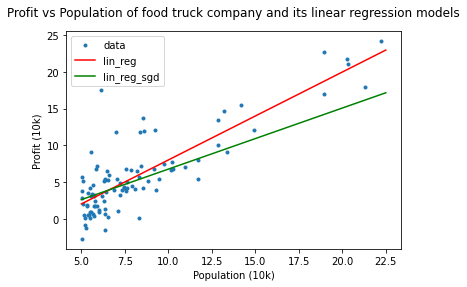

In [7]:
# 1e - Make a plot of the regression line along with the training data.

plt.plot("Population in 10k", "Profit in 10k", '.', data=ft, label = 'data')
X_new = np.array([5, 22.5])
plt.plot(X_new, lin_reg.predict(np.c_[X_new]), color='r', label = 'lin_reg')
plt.plot(X_new, sgd_reg.predict(np.c_[X_new]), color='g', label = 'lin_reg_sgd')
plt.legend()
plt.title('Profit vs Population of food truck company and its linear regression models', pad = 15)
plt.xlabel('Population (10k)')
plt.ylabel('Profit (10k)')

## Problem 2

In [8]:
#Read file and set column names
hp = pd.read_table('Data/houseprice.txt', delimiter= ',', header=None, names=["size sqft","bedrooms","price"])

#take a look at the dataset
print(hp.head())
print(hp.describe())

   size sqft  bedrooms   price
0       2104         3  399900
1       1600         3  329900
2       2400         3  369000
3       1416         2  232000
4       3000         4  539900
         size sqft   bedrooms          price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000


In [9]:
#2a - Train a linear regression model with SGD and print out the minimum cost (RSS)

# Define x and y and make x into a 2d array
X = np.c_[hp[['size sqft', 'bedrooms']]]
y = hp["price"]

# Train model with SGD, change default penalty from ridge L2 to none
sgd_reg = sklearn.linear_model.SGDRegressor(penalty=None, random_state=102)
sgd_reg.fit(X, y)

# Take a look at coef
print('Beta hats for the linear model using SGD =',sgd_reg.intercept_, sgd_reg.coef_)

# Get Y-hat
y_pred_sgd = sgd_reg.predict(X)

# Calculate RSS
RSS_sgd = mean_squared_error(y,y_pred_sgd)*len(y)
print("RSS for this linear model using SGD is",RSS_sgd)

Beta hats for the linear model using SGD = [1.69286825e+10] [1.73426656e+12 5.20299515e+10]
RSS for this linear model using SGD is 6.532683943135568e+32


In [10]:
#2b - Train a linear regression model with a non-iterative method and print out the minimum cost (RSS)

# Train model
lin_reg.fit(X,y)

# Take a look at model coefficients
print('Beta hats for the linear model =',lin_reg.intercept_,lin_reg.coef_)

# Get Y-hat
y_pred_lin = lin_reg.predict(X)

# Calculate RSS
RSS_lin = mean_squared_error(y,y_pred_lin)*len(y)
print("RSS for this linear model is",RSS_lin)


Beta hats for the linear model = 89597.90954279748 [  139.21067402 -8738.01911233]
RSS for this linear model is 192068324756.66592


In [11]:
#2c - Do the minimum costs agree?
print("No, the two minimum costs do not agree. The RSS and coefficients of the sgd model are ridiculously big.")

No, the two minimum costs do not agree. The RSS and coefficients of the sgd model are ridiculously big.


In [12]:
#2d - Scale you feature matrix using sklearn.preprocessing.StandardScaler. 
# See the manual about what it is and how to use it. 
# Train a linear regression model with SGD using the scaled features. 
# Print out the minimum cost and what do you find?

# Use the scaler to standardize x: it subtracts sample mean from each x and then divide the value by the sample's sd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train model with SGD using scaled data, change default penalty from ridge L2 to none
sgd_reg_scale = sklearn.linear_model.SGDRegressor(penalty=None, random_state=103)
sgd_reg_scale.fit(X_scaled, y)

# Take a look at coef
print('Beta hats for the linear model using SGD =',sgd_reg_scale.intercept_, sgd_reg_scale.coef_)

# Get Y-hat
y_pred_sgd_scale = sgd_reg_scale.predict(X_scaled)

# Calculate RSS
RSS_sgd_scale = mean_squared_error(y,y_pred_sgd_scale)*len(y)
print("RSS for this linear model using SGD with scaled data is",RSS_sgd_scale)

print("The RSS is much smaller with scaled data when using SGD. It is similar to that of the non-iterative regression model.")


Beta hats for the linear model using SGD = [340388.48729806] [108922.89013153  -5948.50162663]
RSS for this linear model using SGD with scaled data is 192082545081.88394
The RSS is much smaller with scaled data when using SGD. It is similar to that of the non-iterative regression model.


## Problem 3

In [13]:
#Read file and set column names
qa = pd.read_table('Data/QA.txt', delimiter= ',', header=None, names=["test_1","test_2","result"])

#look at the head of the dataset
qa.head()


,test_1,test_2,result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [14]:
# define decision boundary function for later
def plot_decision_boundary(model, accepted, rejected):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = -1, 1.5
    y_min, y_max = -0.8, 1.2
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(accepted.iloc[:, 0], accepted.iloc[:, 1], marker='x')
    plt.scatter(rejected.iloc[:, 0], rejected.iloc[:, 1], marker='s')
    plt.legend(['Accepted', 'Rejected'])
    plt.xlabel('Test score 1')
    plt.ylabel('Test score 2');

Text(0.5, 1.0, 'Test 1 and Test 2 scores of accepted and rejected microchips')

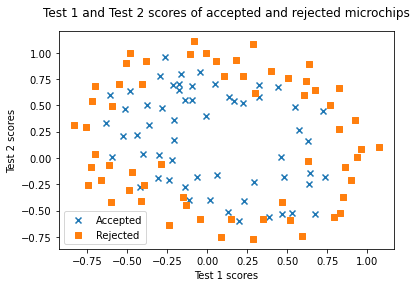

In [15]:
# 3a - Visualize the data; different classes should have different colors and markers.

# create feature matrix:
X = qa.iloc[:, :2]

# create target vector
y = qa.iloc[:, -1]

# filter out accepted microchips:
accepted = qa[qa["result"]==1]

# filter out rejected microchips:
rejected = qa[qa["result"]==0]

# Visualize the data
plt.scatter(accepted.iloc[:,0], accepted.iloc[:,1], label = 'Accepted', marker = 'x')
plt.scatter(rejected.iloc[:,0], rejected.iloc[:,1], label = 'Rejected', marker = 's')
plt.legend()
plt.xlabel('Test 1 scores')
plt.ylabel('Test 2 scores')
plt.title('Test 1 and Test 2 scores of accepted and rejected microchips', pad = 15)

(118, 27)
For alpha = 1, model parameters: [1.27271075] [[ 0.62536719  1.18095854 -2.01961804 -0.91752388 -1.43170395  0.12391867
  -0.36536954 -0.35715555 -0.17501434 -1.45827831 -0.05112356 -0.61575808
  -0.27472128 -1.19276292 -0.24241519 -0.20587922 -0.0448395  -0.27780311
  -0.29535733 -0.45625452 -1.04347339  0.02770608 -0.29252353  0.01550105
  -0.32746466 -0.1439423  -0.92460358]]


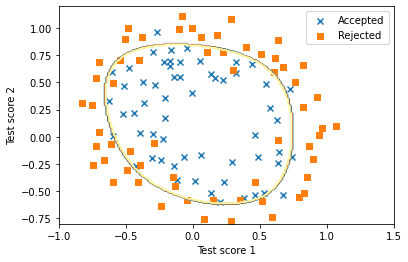

In [16]:
# 3b - Use polynomial features of degree 6 for the logistic regression. 
#Use L2 regulariztion where  𝛼=1 . 
#Use the following function plot_decision_boundary to plot the decision boundary.

# Set X into polynomial features with degree 6
poly = PolynomialFeatures(degree=6, include_bias=False)
X = poly.fit_transform(X)
print(X.shape)

# Fit logit - default penalty is L2, set C =1 for alpha =1 as C =1/alpha
log_reg = sklearn.linear_model.LogisticRegression(C=1)
log_reg.fit(X,y)
print('For alpha = 1, model parameters:', log_reg.intercept_, log_reg.coef_)

plot_decision_boundary(log_reg, accepted, rejected)

For alpha = 0, model parameters: [36.51502768] [[   52.97024945    91.63994388  -353.07217401  -168.80778353
   -185.95255298  -349.43927012  -787.64380399  -670.01186561
   -475.39370439  1132.07070562  1214.07333623  1814.25146921
    864.77783097   487.64406932   548.46317239  1530.14036027
   2384.87848503  2708.63036463  1646.04158176   726.98418949
  -1206.03475652 -2140.37809509 -3910.33278443 -4017.98394906
  -3964.96508915 -1917.13327311  -701.03892789]]


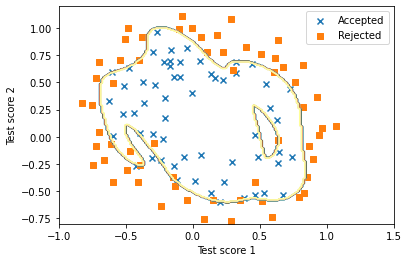

In [17]:
# 3c - Repeat (b) using 𝛼=0 and 𝛼=100

#When alpha is zero for a L2 Ridge logistic regression, it means no regularization, back to usual logistic
log_reg = sklearn.linear_model.LogisticRegression(penalty='none', max_iter=100000)
log_reg.fit(X,y)
print('For alpha = 0, model parameters:', log_reg.intercept_, log_reg.coef_)

plot_decision_boundary(log_reg, accepted, rejected)

For alpha = 100, model parameters: [0.02187841] [[-0.01748166  0.0057109  -0.0551688  -0.01314882 -0.03859837 -0.01846349
  -0.0077322  -0.00892429 -0.02280442 -0.04343841 -0.00235623 -0.01415612
  -0.00349509 -0.04143576 -0.02100588 -0.00471917 -0.00359131 -0.00632226
  -0.00502441 -0.03197665 -0.0341633  -0.00107628 -0.00702615 -0.00038506
  -0.0079823  -0.00154779 -0.04108666]]


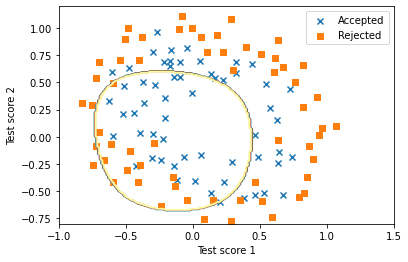

In [18]:
log_reg = sklearn.linear_model.LogisticRegression(C=0.01)
log_reg.fit(X,y)
print('For alpha = 100, model parameters:', log_reg.intercept_, log_reg.coef_)

plot_decision_boundary(log_reg, accepted, rejected)

In [19]:
#3d - What do you find for the three cases?

print("When there is no regularization, or when alpha is too small (alpha=0 in example), there maybe a problem with overfitting. If alpha is too big where there is too much regularization, the decision boundary is underfitting and is not picking the optimal boundary")

When there is no regularization, or when alpha is too small (alpha=0 in example), there maybe a problem with overfitting. If alpha is too big where there is too much regularization, the decision boundary is underfitting and is not picking the optimal boundary
